## Setup

In [18]:
import pandas as pd
import pyarrow as pa
import seaborn as sns
import matplotlib.pyplot as plt


In [19]:

df = pd.read_parquet("data/georgia_complete_dataset.parquet")

df.head()

,time,icao24,callsign,latitude,longitude,altitude,velocity,heading,vertrate,onground
0,2025-01-14 09:52:25+00:00,a4080c,UPS1302,33.821091,-84.241931,1874.52,146.111153,162.585803,-12.02944,False
1,2025-01-14 09:52:26+00:00,a4080c,UPS1302,33.820496,-84.241707,1874.52,145.958017,162.778493,-12.02944,False
2,2025-01-14 09:52:27+00:00,a4080c,UPS1302,33.819828,-84.241505,1866.9,145.958017,162.778493,-12.02944,False
3,2025-01-14 09:52:28+00:00,a4080c,UPS1302,33.819828,-84.241505,1866.9,145.958017,162.778493,-12.02944,False
4,2025-01-14 09:52:29+00:00,a4080c,UPS1302,33.819828,-84.241505,1866.9,145.958017,162.778493,-12.02944,False


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474978 entries, 0 to 9474977
Data columns (total 10 columns):
 #   Column     Dtype                         
---  ------     -----                         
 0   time       timestamp[ns, tz=UTC][pyarrow]
 1   icao24     string                        
 2   callsign   string                        
 3   latitude   double[pyarrow]               
 4   longitude  double[pyarrow]               
 5   altitude   double[pyarrow]               
 6   velocity   double[pyarrow]               
 7   heading    double[pyarrow]               
 8   vertrate   double[pyarrow]               
 9   onground   bool[pyarrow]                 
dtypes: bool[pyarrow](1), double[pyarrow](6), string(2), timestamp[ns, tz=UTC][pyarrow](1)
memory usage: 771.1 MB


In [10]:
print(f"The number of unique aircraft: {df.icao24.nunique()}")

The number of unique aircraft: 3262


In [14]:
# find the time bounds of the data
time_min = df.time.min()
time_max = df.time.max()
time_range = time_max - time_min

print(f"The time bounds of the data: {time_min} to {time_max}")
print(f"Time range: {time_range}")


The time bounds of the data: 2025-01-14 09:52:25+00:00 to 2025-01-14 20:59:59+00:00
Time range: 0 days 11:07:34


## Univariate Analysis 

Exploring the numerical features - altitude, speed, vertical rate, etc.

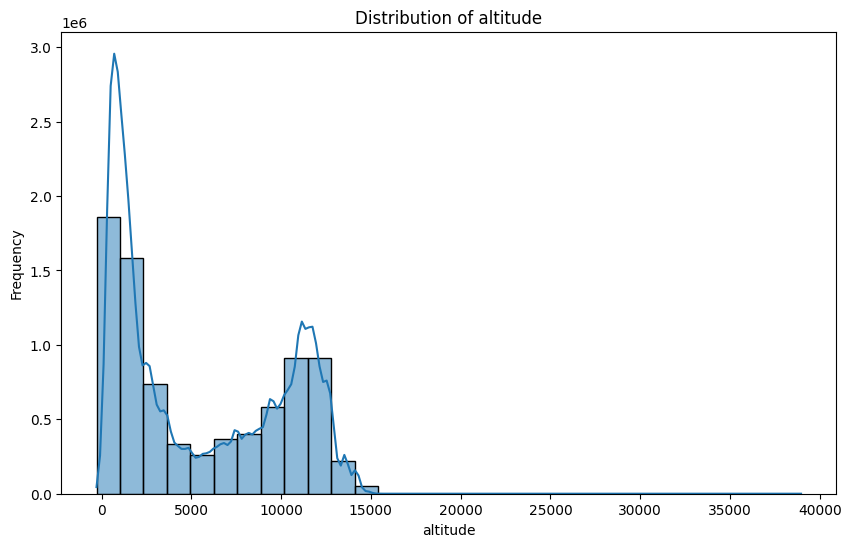

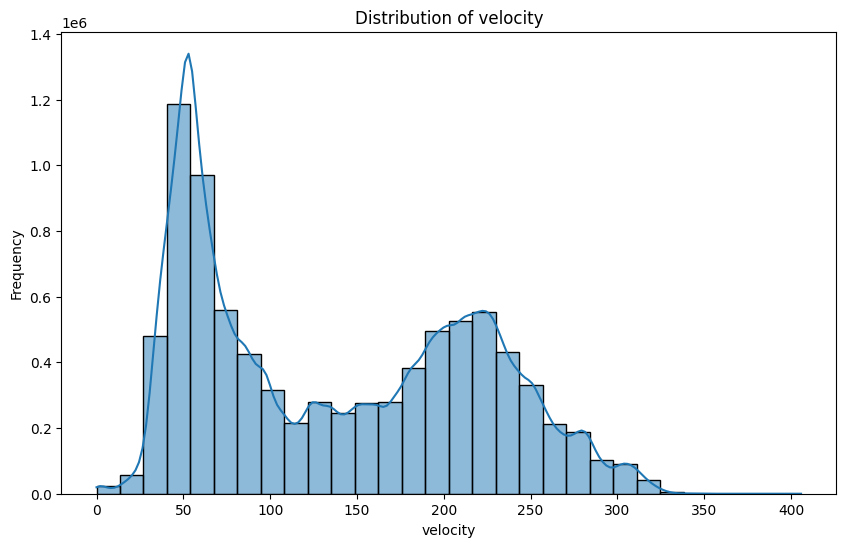

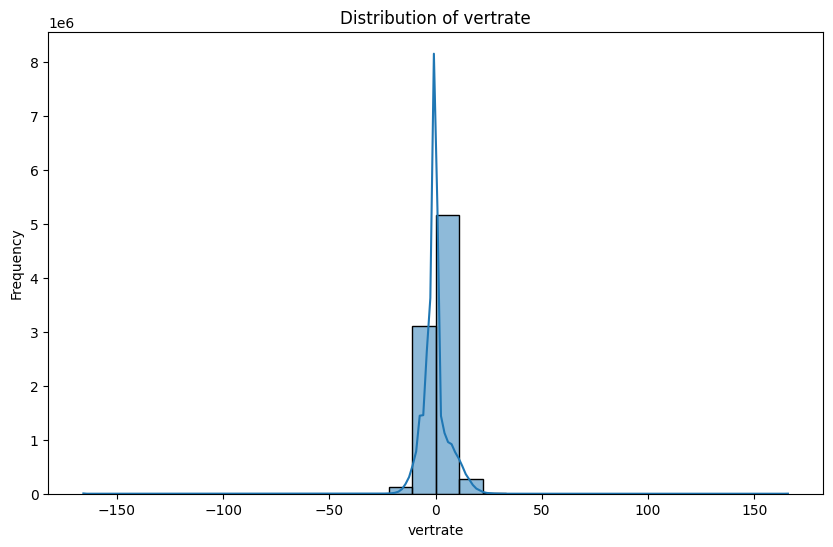

In [23]:
# Plotting histograms for each numerical feature
numerical_features = ['altitude', 'velocity', 'vertrate']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Visualizing Flight Paths

Tracking a single aircraft - simple method using matplotlib

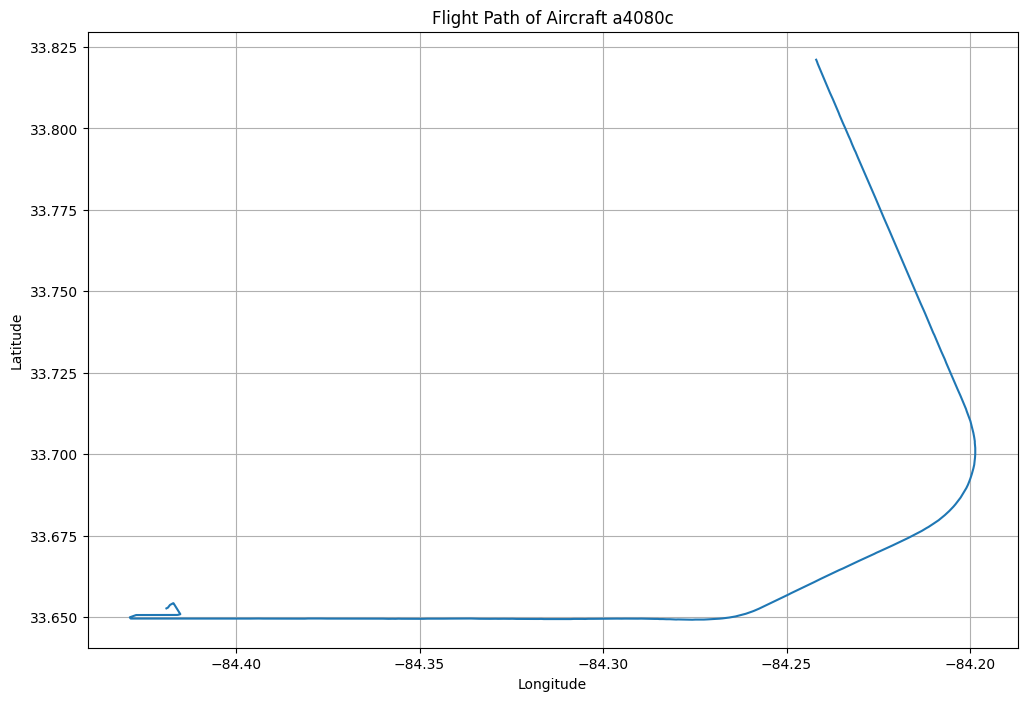

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import folium  # for interactive map visualization

# Filter for a single aircraft
icao24_to_track = 'a4080c'  # This is the aircraft ID from your data
single_aircraft = df[df['icao24'] == icao24_to_track].copy()

# Sort by time to ensure proper trajectory plotting
single_aircraft = single_aircraft.sort_values('time')

# Method 1: Simple Matplotlib plot
plt.figure(figsize=(12, 8))
plt.plot(single_aircraft['longitude'], single_aircraft['latitude'])
plt.title(f'Flight Path of Aircraft {icao24_to_track}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


Interactive map using Folium

In [16]:

# Method 2: Interactive Map with Folium
m = folium.Map(
    location=[single_aircraft['latitude'].mean(), 
              single_aircraft['longitude'].mean()],
    zoom_start=6
)

# Add the flight path
points = list(zip(single_aircraft['latitude'], 
                 single_aircraft['longitude']))
folium.PolyLine(
    points,
    weight=2,
    color='red',
    opacity=0.8
).add_to(m)

# Add markers for start and end points
folium.Marker(
    points[0],
    popup='Start',
    icon=folium.Icon(color='green')
).add_to(m)

folium.Marker(
    points[-1],
    popup='End',
    icon=folium.Icon(color='red')
).add_to(m)

# Display the map
m